1.importing the required python libraries for data analysis and visualisation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2.Loading the dataset(netflix) for exploration

In [2]:
df = pd.read_csv("/content/drive/MyDrive/netflix_dataset/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df["rating"].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


**Data Cleaning**
we observe that there are nested information in certain like "cast","director","listed in","country".It has to be unnested so that better analysis can be done over it to extract insights.These four columns are splitted based on comma as delimiter using split() function.

In [5]:
unstacked1 = df["cast"].apply(lambda x:str(x).split(",")).tolist()
unstacked2 = df["country"].apply(lambda x:str(x).split(",")).tolist()
unstacked3 = df["director"].apply(lambda x:str(x).split(",")).tolist()
unstacked4 = df["listed_in"].apply(lambda x:str(x).split(",")).tolist()

In [6]:
df_cast = pd.DataFrame(unstacked1,index=df["title"])
df_cast

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [7]:
df_cast=df_cast.stack()
df_cast

title                  
Dick Johnson Is Dead  0                       nan
Blood & Water         0                Ama Qamata
                      1               Khosi Ngema
                      2             Gail Mabalane
                      3            Thabang Molaba
                                    ...          
Zubaan                3          Manish Chaudhary
                      4              Meghna Malik
                      5             Malkeet Rauni
                      6            Anita Shabdish
                      7     Chittaranjan Tripathy
Length: 64951, dtype: object

In [8]:
df_cast=pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[["title",0]]
df_cast


,title,0
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [9]:
df_cast.columns = ["title","cast"]
df_cast

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [10]:
df_country = pd.DataFrame(unstacked2,index=df["title"])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace = True)
df_country = df_country[["title",0]]
df_country.columns = ["title","country"]
df_country

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [11]:
df_director = pd.DataFrame(unstacked3,index=df["title"])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace = True)
df_director = df_director[["title",0]]
df_director.columns = ["title","director"]
df_director

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [12]:
df_listed_in = pd.DataFrame(unstacked4,index=df["title"])
df_listed_in = df_listed_in.stack()
df_listed_in = pd.DataFrame(df_listed_in)
df_listed_in.reset_index(inplace = True)
df_listed_in = df_listed_in[["title",0]]
df_listed_in.columns = ["title","listed_in"]
df_listed_in

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


Unnested columns are merged with original dataframe using merge() function which helps in data manipulation.


In [13]:
merge1 = df_cast.merge(df_director,on="title",how="inner")
merge1

,title,cast,director
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
...,...,...,...
70807,Zubaan,Manish Chaudhary,Mozez Singh
70808,Zubaan,Meghna Malik,Mozez Singh
70809,Zubaan,Malkeet Rauni,Mozez Singh
70810,Zubaan,Anita Shabdish,Mozez Singh


In [14]:
merge2=merge1.merge(df_listed_in,on="title",how="inner")
merge2

,title,cast,director,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,nan,International TV Shows
2,Blood & Water,Ama Qamata,nan,TV Dramas
3,Blood & Water,Ama Qamata,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,International TV Shows
...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies


In [15]:
merge3=merge2.merge(df_country,on="title",how="inner")
merge3

,title,cast,director,listed_in,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [16]:
final_df=merge3.merge(df,on="title",how="inner")
final_df.drop(columns=["cast_y","director_y","listed_in_y","country_y"],axis=1,inplace=True)
final_df

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


# Handling the missing values
Missing values in the dataset are handled using imputations.Since we find most of our data to be non quantative in nature,we use mode to fill missing values of "country" column. In case of "cast" and "director",missing values are replaced with "no cast" and "no director".

In [17]:
(final_df["cast_x"]=="nan").value_counts()
#counts the number of missing values in cast column--True indicates number of nan

,count
cast_x,
False,199916
True,2149


In [18]:
final_df["cast_x"].replace("nan","no cast",inplace=True)

<ipython-input-18-0ccb35f53019>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["cast_x"].replace("nan","no cast",inplace=True)


In [19]:
(final_df["listed_in_x"]=="nan").value_counts()
#There are no missing values in listed_in column

,count
listed_in_x,
False,202065


In [20]:
(final_df["director_x"]=="nan").value_counts()

,count
director_x,
False,151422
True,50643


In [21]:
(final_df["director_x"]=="nan").replace("nan","No director",inplace = True)

In [22]:
(final_df["country_x"]=="nan").value_counts()

,count
country_x,
False,190168
True,11897


In [23]:
country_mode=final_df["country_x"].mode()
country_mode

,country_x
0,United States


In [24]:
final_df["country_x"].replace("nan",country_mode[0],inplace=True)

<ipython-input-24-7e159236af02>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["country_x"].replace("nan",country_mode[0],inplace=True)


In [25]:
final_df

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,no cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [26]:
final_df["rating"].value_counts()

,count
rating,
TV-MA,73915
TV-14,43957
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [27]:
mask = final_df["duration"].isna()
final_df[mask]

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN,"Louis C.K. muses on religion, eternal love, gi..."
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN,Emmy-winning comedy writer Louis C.K. brings h...
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN,The comic puts his trademark hilarious/thought...


In the above result,we observe that rating columns have values 74min,84min,66min and duration columns have nan.We observe that,this might have occured due to misentry.Above output helped us extract rows and it can be further reassigned to duration column

In [28]:
final_df.loc[126582,"duration"]=final_df.loc[126582,"rating"]
final_df.loc[131648,"duration"]=final_df.loc[131648,"rating"]
final_df.loc[131782,"duration"]=final_df.loc[131782,"rating"]

In [29]:
final_df.loc[126582,"rating"]=np.nan
final_df.loc[131648,"rating"]=np.nan
final_df.loc[131782,"rating"]=np.nan

In [30]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202065 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         202065 non-null  object
 1   cast_x        202065 non-null  object
 2   director_x    202065 non-null  object
 3   listed_in_x   202065 non-null  object
 4   country_x     202065 non-null  object
 5   show_id       202065 non-null  object
 6   type          202065 non-null  object
 7   date_added    201907 non-null  object
 8   release_year  202065 non-null  int64 
 9   rating        201995 non-null  object
 10  duration      202065 non-null  object
 11  description   202065 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [31]:
final_df.isna().sum()

,0
title,0
cast_x,0
director_x,0
listed_in_x,0
country_x,0
show_id,0
type,0
date_added,158
release_year,0
rating,70


Handling the missing values in rating column using mode

In [32]:
movie_rating=final_df.loc[final_df["type"]=="Movie","rating"].mode()[0]
movie_rating

'TV-MA'

In [33]:
TV_rating=final_df.loc[final_df["type"]=="TV Show","rating"].mode()[0]
TV_rating

'TV-MA'

In [34]:
final_df["rating"]=final_df.apply(lambda x: movie_rating if x["type"]=="Movie"
  and pd.isna(x["rating"]) else TV_rating if x["type"]=="TV Show"
  and pd.isna(x["rating"]) else x["rating"], axis=1
)

In [35]:
final_df.isna().sum()

,0
title,0
cast_x,0
director_x,0
listed_in_x,0
country_x,0
show_id,0
type,0
date_added,158
release_year,0
rating,0


Missing values in date_added columns are filled with zeros as further imputations cannot be done

In [36]:
final_df["date_added"].fillna(0,inplace=True)

<ipython-input-36-12d64309e223>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["date_added"].fillna(0,inplace=True)


In [37]:
final_df.isna().sum()

,0
title,0
cast_x,0
director_x,0
listed_in_x,0
country_x,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


In [38]:
final_df.loc[final_df.duplicated()]

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
39354,Rust Creek,Micah Hauptman,Jen McGowan,Thrillers,United States,s1632,Movie,"November 30, 2020",2018,R,108 min,A wrong turn in the woods becomes a fight for ...
135656,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135657,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135658,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,Dramas,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135659,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,Denmark,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135660,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,France,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."
135661,300 Miles to Heaven,Adrianna Biedrzyńska,Maciej Dejczer,International Movies,Poland,s6014,Movie,"October 1, 2019",1989,TV-14,93 min,"Hoping to help their dissident parents, two br..."


In [39]:
final_df.drop_duplicates(keep="first")

,title,cast_x,director_x,listed_in_x,country_x,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,no cast,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


Converting date_added column to datetime format and extracting date,month,year for analysis

In [40]:
print(final_df["date_added"].unique())  # Check unique values


['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']


In [41]:
final_df["date_added"] = pd.to_datetime(final_df["date_added"], errors='coerce')


In [42]:
print(final_df["date_added"].isna().sum())  # Count NaT values


1746


In [43]:
final_df = final_df.dropna(subset=["date_added"])


In [44]:
final_df["date_added"].fillna(pd.to_datetime("2000-01-01"), inplace=True)


<ipython-input-44-9b3d1e09d574>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df["date_added"].fillna(pd.to_datetime("2000-01-01"), inplace=True)
<ipython-input-44-9b3d1e09d574>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["date_added"].fillna(pd.to_datetime("2000-01-01"), inplace=True)


In [45]:
final_df["year_added"] = final_df["date_added"].dt.year
final_df["month_added"] = final_df["date_added"].dt.month
final_df["month_name_added"] = final_df["date_added"].dt.month_name()
final_df["week_added"] = final_df["date_added"].dt.isocalendar().week


<ipython-input-45-2d22a137aace>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["year_added"] = final_df["date_added"].dt.year
<ipython-input-45-2d22a137aace>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["month_added"] = final_df["date_added"].dt.month
<ipython-input-45-2d22a137aace>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

In [46]:
print(final_df[["date_added", "year_added", "month_added", "week_added"]].head())


  date_added  year_added  month_added  week_added
0 2021-09-25        2021            9          38
1 2021-09-24        2021            9          38
2 2021-09-24        2021            9          38
3 2021-09-24        2021            9          38
4 2021-09-24        2021            9          38


In [47]:
final_df["date_added"]=pd.to_datetime(final_df["date_added"])
final_df["year_added"]=final_df["date_added"].dt.year
final_df["month_added"]=final_df["date_added"].dt.month
final_df["month_name_added"]=final_df["date_added"].dt.month_name()
final_df["week_added"]=final_df["date_added"].dt.isocalendar().week

<ipython-input-47-f3230ed63d4d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["date_added"]=pd.to_datetime(final_df["date_added"])
<ipython-input-47-f3230ed63d4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["year_added"]=final_df["date_added"].dt.year
<ipython-input-47-f3230ed63d4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [48]:
print(final_df.columns)


Index(['title', 'cast_x', 'director_x', 'listed_in_x', 'country_x', 'show_id',
       'type', 'date_added', 'release_year', 'rating', 'duration',
       'description', 'year_added', 'month_added', 'month_name_added',
       'week_added'],
      dtype='object')


In [49]:
final_df.rename(columns={"cast_x":"cast",
                         "director_x":"director",
                         "listed_in_x":"genre",
                         "country_x":"country"}, inplace=True)

<ipython-input-49-befbd58969a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.rename(columns={"cast_x":"cast",


In [50]:
print(final_df.columns)


Index(['title', 'cast', 'director', 'genre', 'country', 'show_id', 'type',
       'date_added', 'release_year', 'rating', 'duration', 'description',
       'year_added', 'month_added', 'month_name_added', 'week_added'],
      dtype='object')


In [51]:
final_df["country"] = final_df["country"].str.strip()
final_df["director"] = final_df["director"].str.strip()
final_df["cast"] = final_df["cast"].str.strip()
final_df["genre"] = final_df["genre"].str.strip()
final_df["rating"] = final_df["rating"].str.strip()


<ipython-input-51-9c724778015a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["country"] = final_df["country"].str.strip()
<ipython-input-51-9c724778015a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["director"] = final_df["director"].str.strip()
<ipython-input-51-9c724778015a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [52]:
final_df

,title,cast,director,genre,country,show_id,type,date_added,release_year,rating,duration,description,year_added,month_added,month_name_added,week_added
0,Dick Johnson Is Dead,no cast,Kirsten Johnson,Documentaries,United States,s1,Movie,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",2021,9,September,38
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",2021,9,September,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,2019,3,March,9


In [53]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200319 entries, 0 to 202064
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   title             200319 non-null  object        
 1   cast              200319 non-null  object        
 2   director          200319 non-null  object        
 3   genre             200319 non-null  object        
 4   country           200319 non-null  object        
 5   show_id           200319 non-null  object        
 6   type              200319 non-null  object        
 7   date_added        200319 non-null  datetime64[ns]
 8   release_year      200319 non-null  int64         
 9   rating            200319 non-null  object        
 10  duration          200319 non-null  object        
 11  description       200319 non-null  object        
 12  year_added        200319 non-null  int32         
 13  month_added       200319 non-null  int32         
 14  month_nam

#Exploratory Data Analysis
Lets find out the number of unique values in each column for better analysis using nunique()

In [54]:
final_df["rating"].nunique()

14

In [55]:
final_df["genre"].nunique()

42

In [56]:
final_df["director"].nunique()

4990

In [57]:
final_df["country"].nunique()

123

In [58]:
final_df["cast"].nunique()

36142

In [59]:
final_df["title"].nunique()

8709

Distribution of content type in Netflix library

In [60]:
x=final_df.groupby(["type"])["type"].count()
y=len(final_df)
percentage=((x/y)*100).round(2)
df_type=pd.DataFrame(percentage)
df_type.rename({"type":"percenatge"},axis=1,inplace=True)
df_type

,percenatge
type,
Movie,72.84
TV Show,27.16


Visualizing the distribution in a pieplot

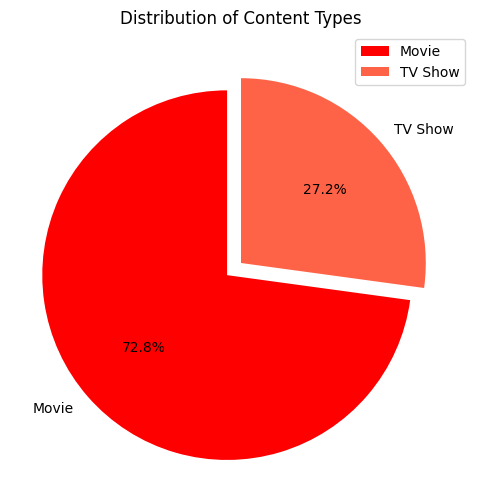

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentage correctly
x = final_df.groupby(["type"])["type"].count()  # Count occurrences of each type
y = len(final_df)  # Total number of rows
percentage = ((x / y) * 100).round(2)  # Calculate percentage

# Create DataFrame correctly
df_type = pd.DataFrame({"percentage": percentage})  # Ensuring correct column name

# Plot Pie Chart
plt.figure(figsize=(10,6))
plt.pie(df_type["percentage"], labels=df_type.index, colors=("r", "tomato"),
        explode=(0.1, 0), autopct='%1.1f%%', startangle=90)
plt.legend(loc="upper right")
plt.title("Distribution of Content Types")
plt.show()


2.Count and Visualisation of Categorical Variables

In [62]:
x

,type
type,
Movie,145917
TV Show,54402


Text(0.5, 1.0, 'Count of Content Types')

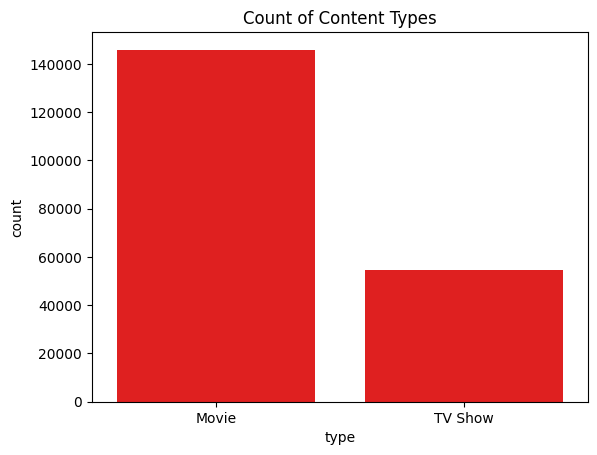

In [63]:
sns.countplot(x="type",data=final_df,color="r")
plt.xlabel("type")
plt.ylabel("count")
plt.title("Count of Content Types")

In [64]:
final_df["rating"].value_counts()

,count
rating,
TV-MA,73230
TV-14,43480
R,25860
PG-13,16246
TV-PG,14671
PG,10919
TV-Y7,6248
TV-Y,3597
TV-G,2740


<ipython-input-65-6c8c6e82e1a6>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:r'` for the same effect.

  sns.countplot(x="rating",data=final_df,hue="type",order=final_df["rating"].value_counts().index,color="r")


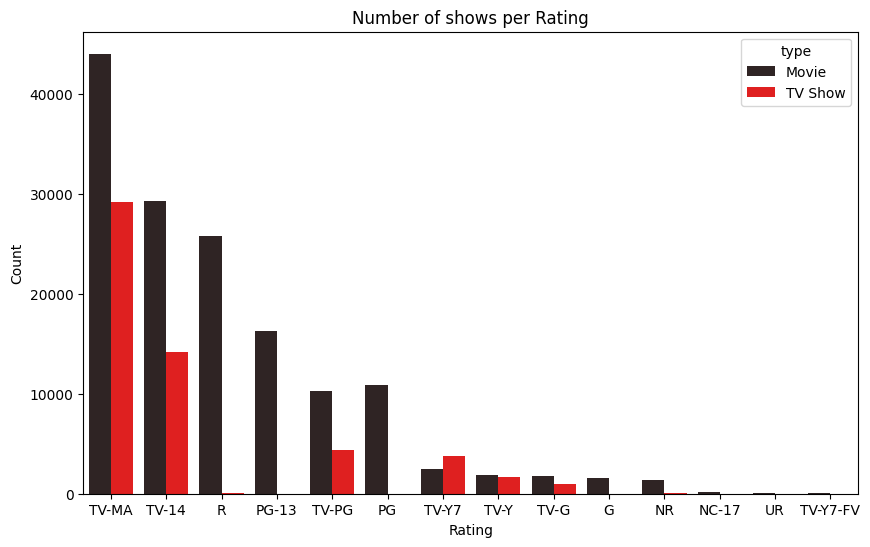

In [65]:
plt.figure(figsize=(10,6))
sns.countplot(x="rating",data=final_df,hue="type",order=final_df["rating"].value_counts().index,color="r")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Number of shows per Rating")
plt.show()

In [66]:
country_count=final_df["country"].value_counts()
top_10_countries=country_count.head(10)
top_10_countries

,count
country,
United States,70567
India,22808
United Kingdom,12658
Japan,8591
France,8215
Canada,7732
Spain,5170
South Korea,4978
Germany,4338


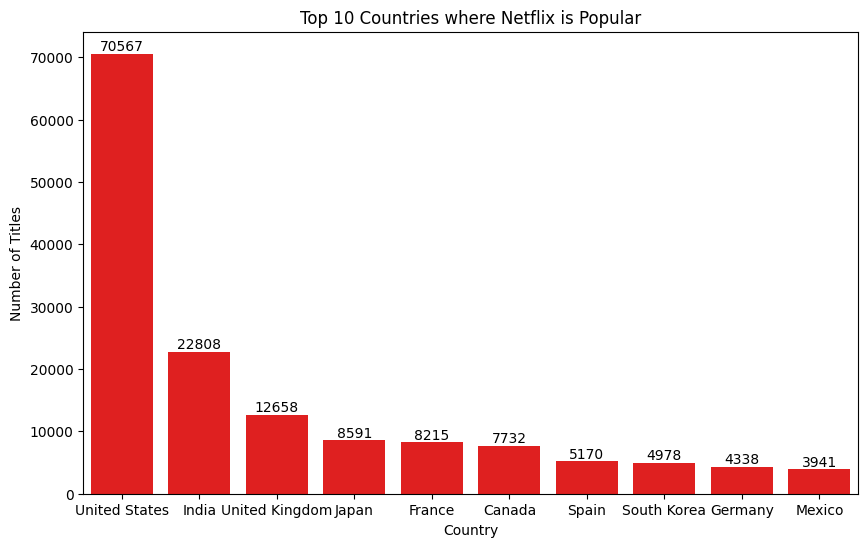

In [67]:
plt.figure(figsize=(10,6))
bar_plot=sns.barplot(x=top_10_countries.index,y=top_10_countries.values,color='red')
for index,value in enumerate(top_10_countries.values):
  bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries where Netflix is Popular")
plt.show()

In [68]:
director_count = final_df["director"].value_counts()[1:]
top_5_directors = director_count.head()
top_5_directors

,count
director,
Martin Scorsese,419
Youssef Chahine,409
Cathy Garcia-Molina,356
Steven Spielberg,355
Lars von Trier,336


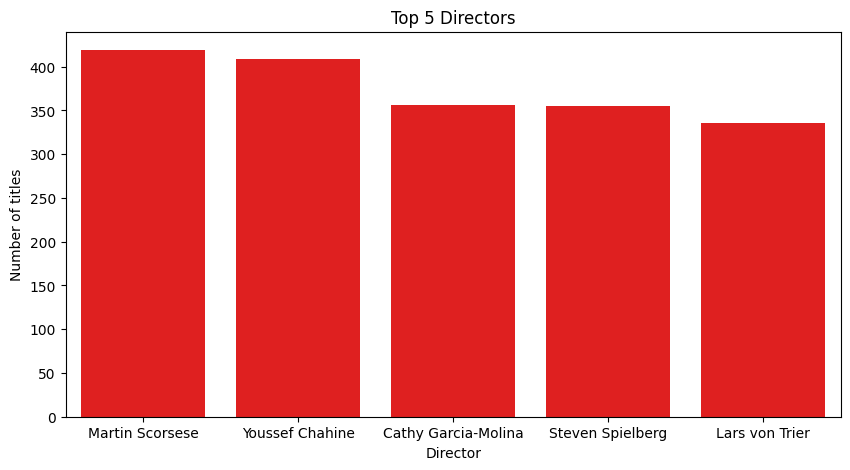

In [69]:
plt.figure(figsize = (10,5))
sns.barplot(x=top_5_directors.index,y=top_5_directors.values,color="red")
plt.xlabel("Director")
plt.ylabel("Number of titles")
plt.title("Top 5 Directors")
plt.show()

In [70]:
genre_count = final_df["genre"].value_counts()
top_10_genre = genre_count.head(10)
top_10_genre

,count
genre,
Dramas,29806
International Movies,28243
Comedies,20829
International TV Shows,12615
Action & Adventure,12216
Independent Movies,9834
Children & Family Movies,9771
TV Dramas,8628
Thrillers,7107


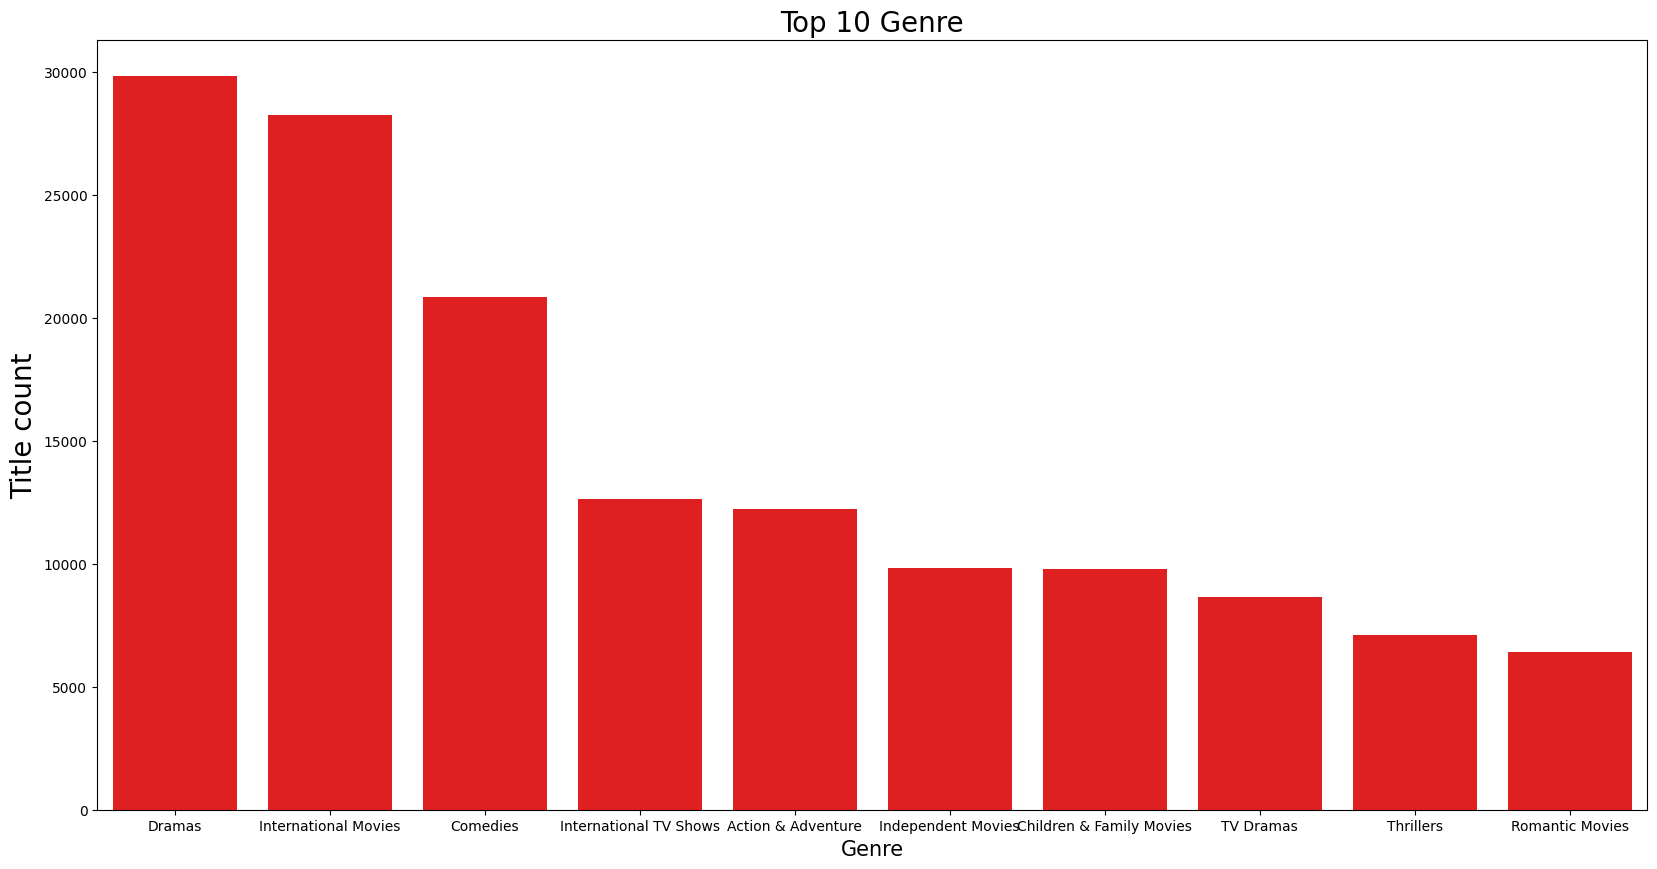

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(x=top_10_genre.index,y=top_10_genre.values,color="red")
plt.xlabel("Genre",fontsize=15)
plt.ylabel("Title count",fontsize=20)
plt.title("Top 10 Genre",fontsize=20)
plt.show()

In [72]:
cast_count = final_df["cast"].value_counts()[1:]
top_10_cast=cast_count.head(10)
top_10_cast

,count
cast,
Liam Neeson,161
Alfred Molina,160
John Krasinski,138
Salma Hayek,130
Frank Langella,128
Anupam Kher,127
John Rhys-Davies,125
Shah Rukh Khan,108
Naseeruddin Shah,106


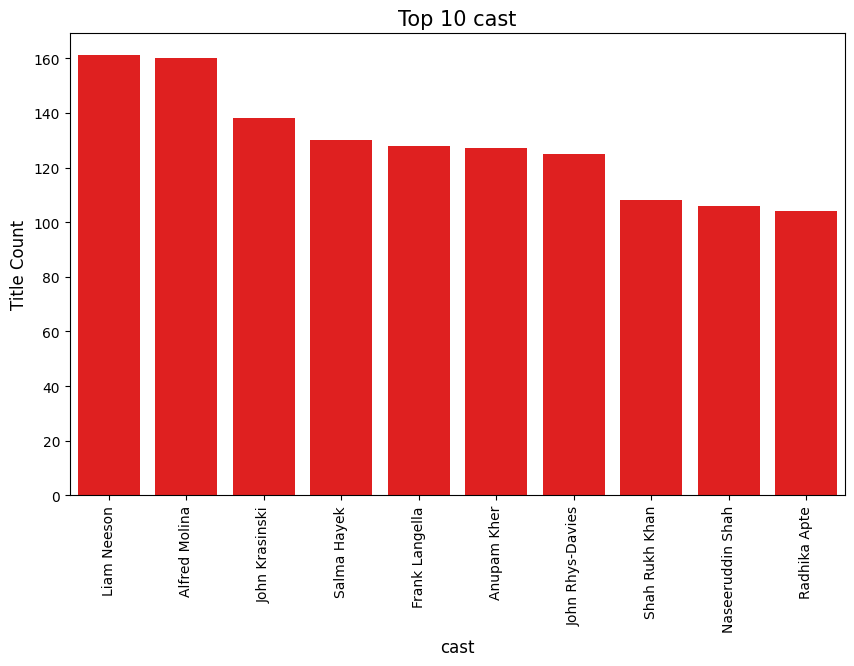

In [73]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.barplot(x=top_10_cast.index,y=top_10_cast.values,color="red")
plt.xlabel("cast",fontsize=12)
plt.ylabel("Title Count",fontsize=12)
plt.title("Top 10 cast",fontsize=15)
plt.show()

The above analysis help us to conclude that "movie" content type dominated netflix library compared to "TV Shows".We also obsrve that most of the content is released in "United States",and then "India".Data visualisation also helped us to get top 10 "cast","directors","genre" which helped us to understand about audience reception. Producing more of those content will help Netflix to retain its subscribers.

3.Comparison of TV shows and Movies analysis

In [74]:
Movie=final_df.loc[final_df["type"]=="Movie"]
Popular_Country=Movie.groupby(["country"])["title"].nunique().sort_values(ascending=False)[:11]

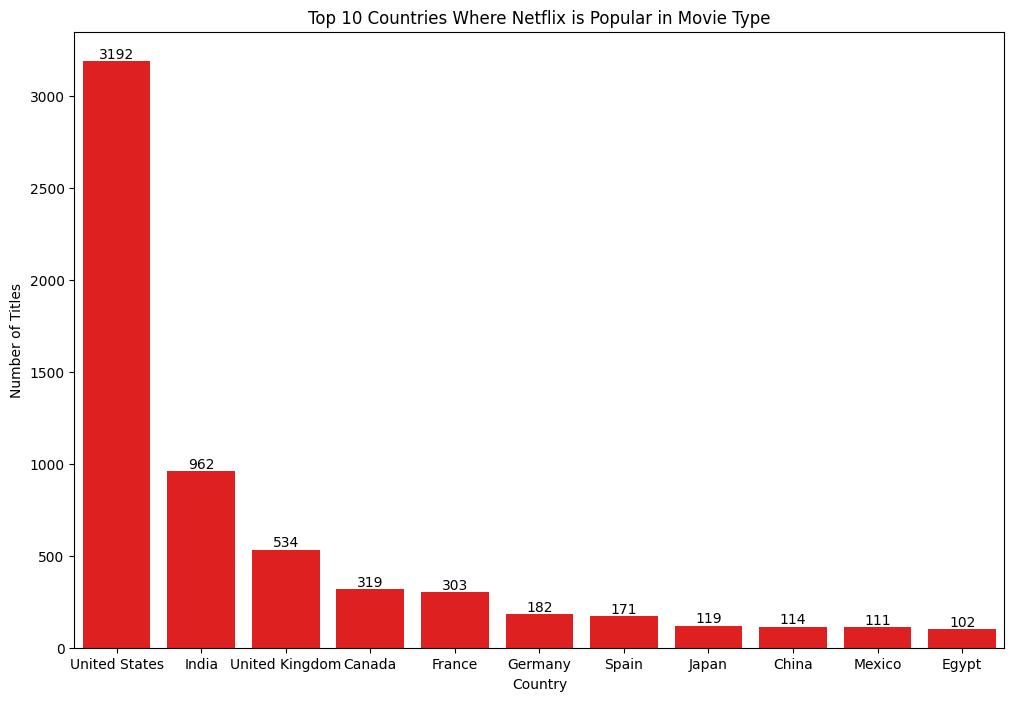

In [75]:
plt.figure(figsize=(12,8))
bar_plot_y=sns.barplot(x=Popular_Country.index, y=Popular_Country.values,color="red")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.title('Top 10 Countries Where Netflix is Popular in Movie Type')
for index, value in enumerate(Popular_Country.values):
  bar_plot_y.text(index, value, str(value), ha='center', va='bottom')
plt.show()

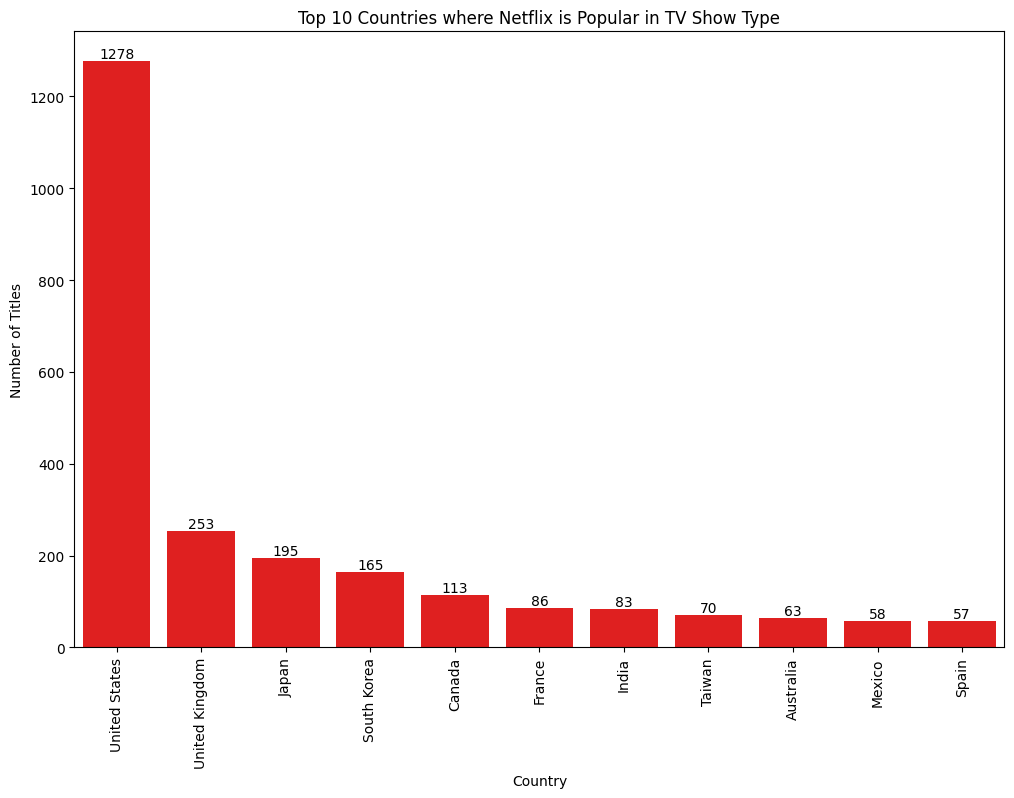

In [76]:
TV_show=final_df.loc[final_df["type"]=="TV Show"]
popular_countries=TV_show.groupby(["country"])["title"].nunique().sort_values(ascending=False)[:11]
plt.figure(figsize=(12,8))
bar_plot_h=sns.barplot(x=popular_countries.index,y=popular_countries.values,color="red")
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Countries where Netflix is Popular in TV Show Type')
for index,value in enumerate(popular_countries.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.show()

From the above analysis, it helps us to better understand what type of content to be released in each country to retain the subscribers.In case of United states both movies and TV shows are at the top

4.Best time to launch Movie/TV show

In [77]:
Best_week_Movie = Movie.groupby(["week_added"])["title"].nunique().sort_values(ascending=False)[:1]
Best_week_Movie

,title
week_added,
1,316


In [78]:
Best_week_Tvshow=TV_show.groupby(["week_added"])["title"].nunique().sort_values(ascending=False)[:1]
Best_week_Tvshow

,title
week_added,
27,85


Above result shows that best week to launch Movie is week 1 and Tv show is week 27

In [79]:
Best_month_Movie=Movie.groupby(["month_name_added"])["title"].nunique().sort_values(ascending=False)
Best_month_Movie

,title
month_name_added,
July,565
April,550
December,547
January,546
October,545
March,529
September,519
August,519
November,498


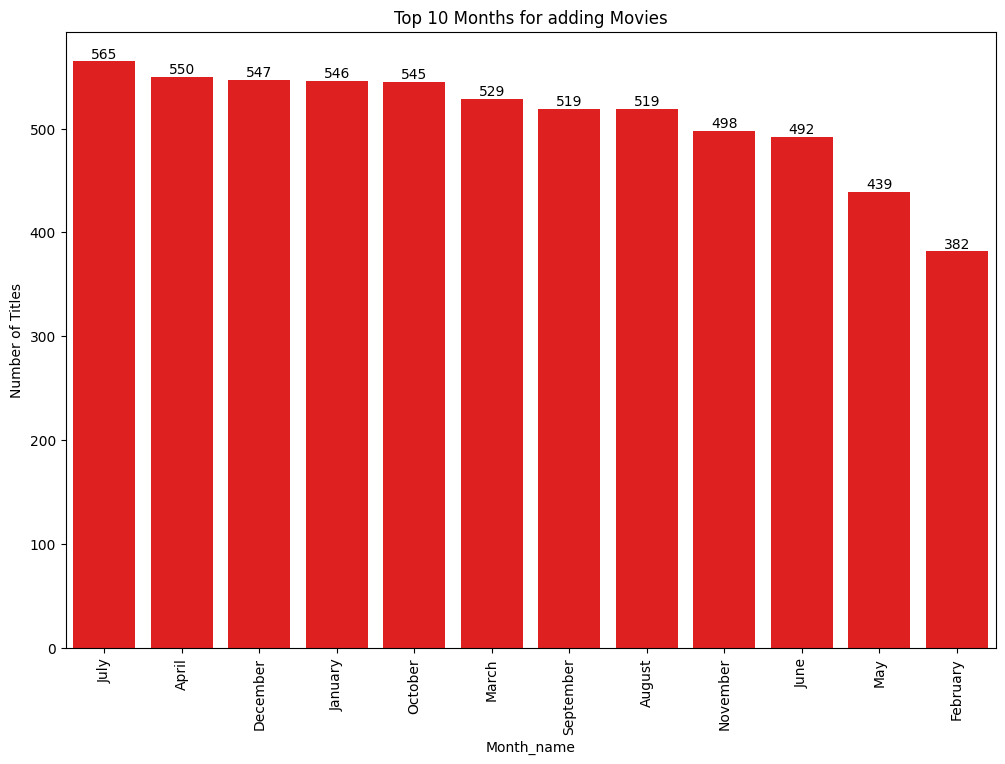

In [80]:
plt.figure(figsize=(12,8))
bar_plot_h=sns.barplot(x=Best_month_Movie.index,y=Best_month_Movie.values,color="red")
plt.xlabel('Month_name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Months for adding Movies')
for index,value in enumerate(Best_month_Movie.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.show()

In [81]:
Best_month_Tvshow=TV_show.groupby(["month_name_added"])["title"].nunique().sort_values(ascending=False)
Best_month_Tvshow

,title
month_name_added,
July,254
December,250
September,246
June,232
August,230
October,210
April,209
March,205
November,199


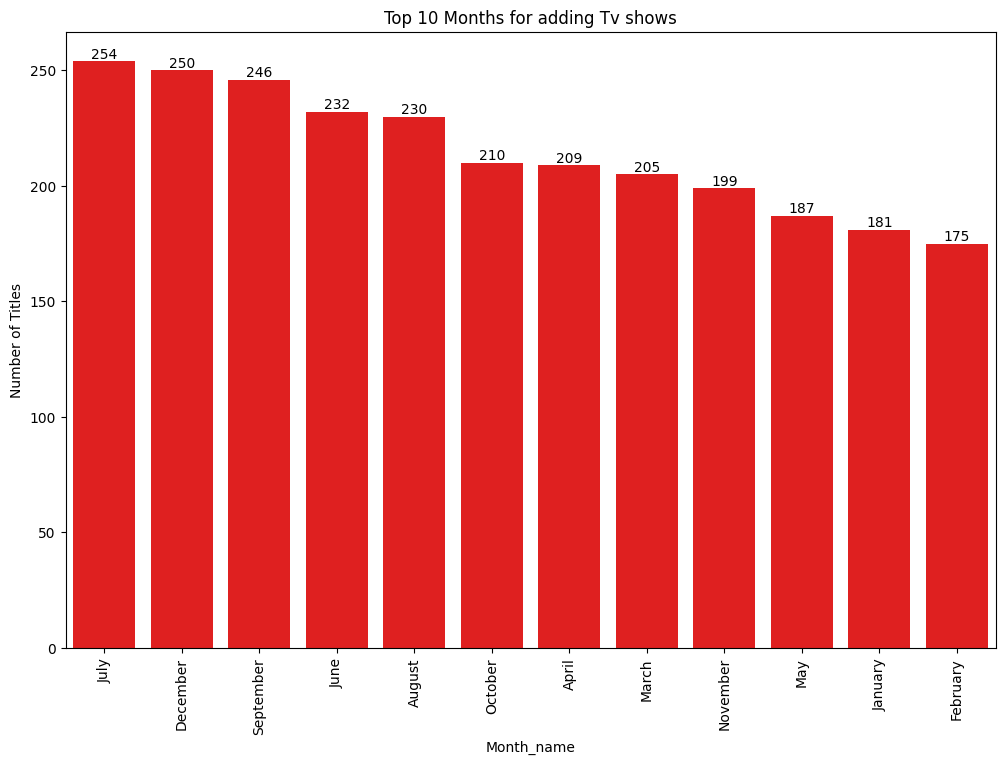

In [82]:
plt.figure(figsize=(12,8))
bar_plot_h=sns.barplot(x=Best_month_Tvshow.index,y=Best_month_Tvshow.values,color="red")
plt.xlabel('Month_name')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Months for adding Tv shows')
for index,value in enumerate(Best_month_Tvshow.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.show()

Above result shows that to add movies-JULY is the best month and to add TV show-DECEMBER is the best month.

5.Analysis of actor/director of different type of TV show/Movies

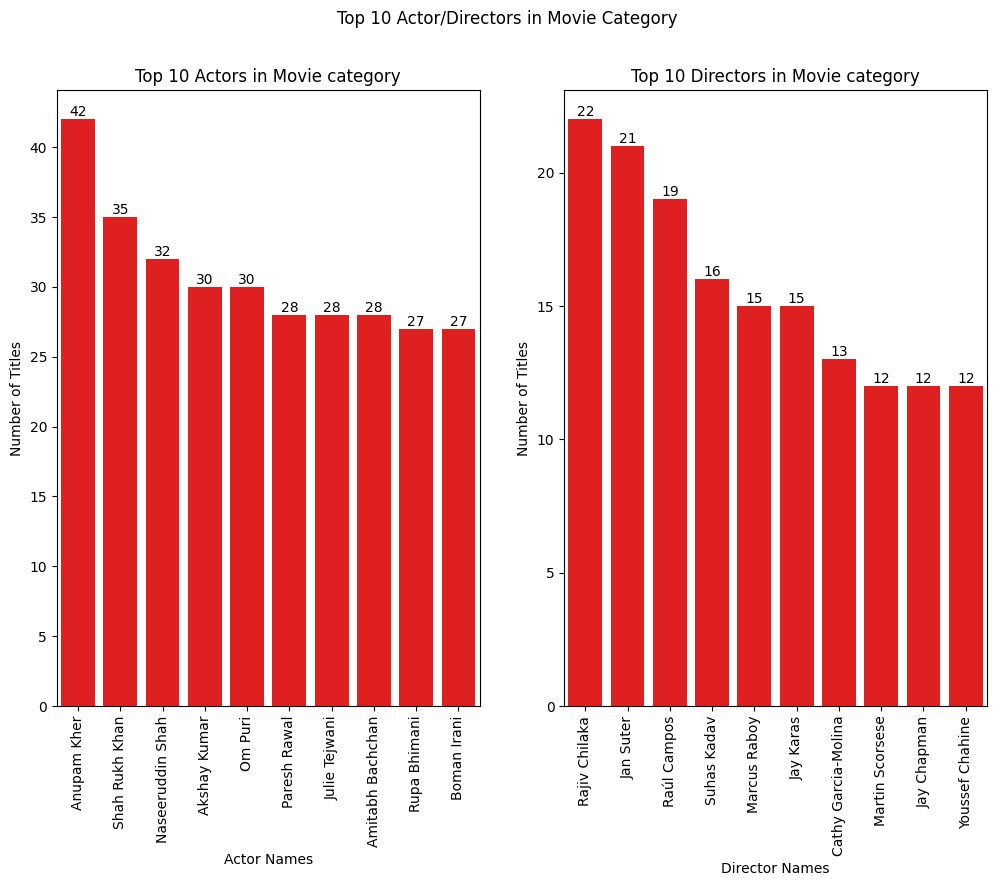

In [83]:
top_10_actors_movie=Movie.groupby(["cast"])["title"].nunique().sort_values(ascending=False)[1:11]
top_10_directors_movie=Movie.groupby(["director"])["title"].nunique().sort_values(ascending=False)[1:11]
plt.figure(figsize=(12,8)).suptitle("Top 10 Actor/Directors in Movie Category")
plt.subplot(1,2,1)
bar_plot_h=sns.barplot(x=top_10_actors_movie.index,y=top_10_actors_movie.values,color="red")
plt.xlabel('Actor Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Actors in Movie category')
for index,value in enumerate(top_10_actors_movie.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.subplot(1,2,2)
bar_plot_h=sns.barplot(x=top_10_directors_movie.index,y=top_10_directors_movie.values,color="red")
plt.xlabel('Director Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Directors in Movie category')
for index,value in enumerate(top_10_directors_movie.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.show()



6.Top actor/director in TV show category

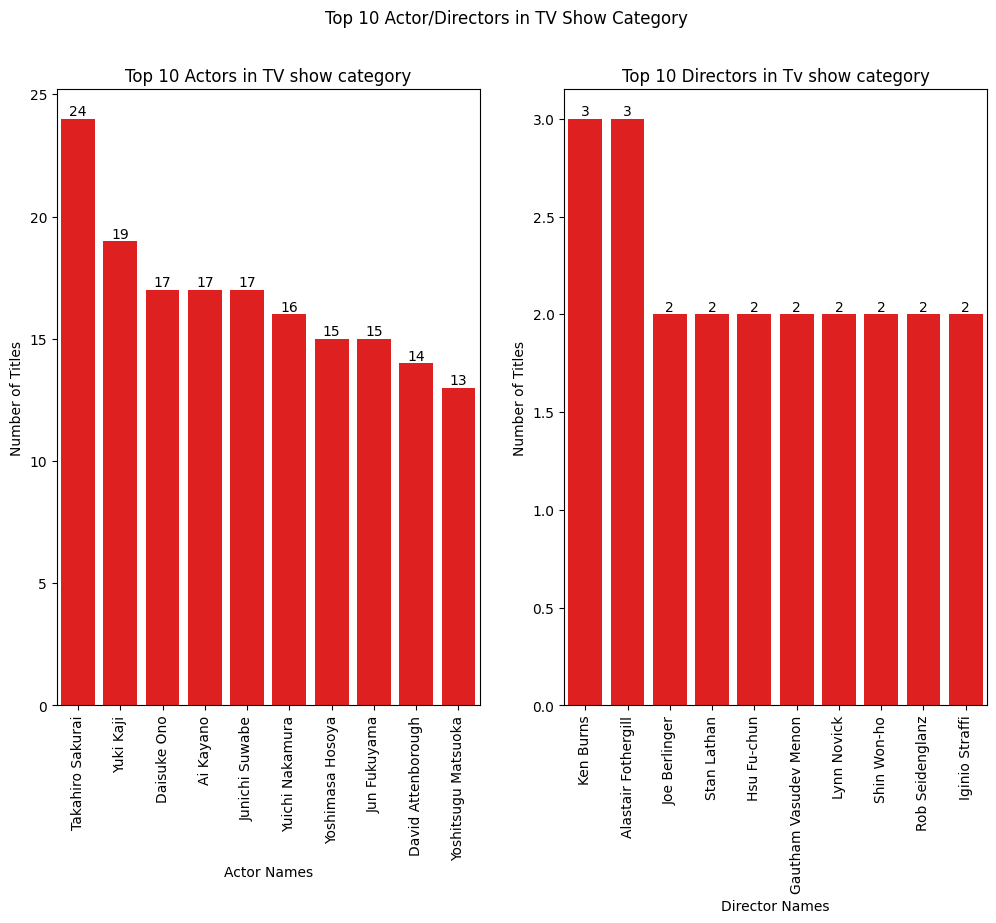

In [84]:
top_10_actors_Tvshow=TV_show.groupby(["cast"])["title"].nunique().sort_values(ascending=False)[1:11]
top_10_directors_Tvshow=TV_show.groupby(["director"])["title"].nunique().sort_values(ascending=False)[1:11]
plt.figure(figsize=(12,8)).suptitle("Top 10 Actor/Directors in TV Show Category")
plt.subplot(1,2,1)
bar_plot_h=sns.barplot(x=top_10_actors_Tvshow.index,y=top_10_actors_Tvshow.values,color="red")
plt.xlabel('Actor Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Actors in TV show category')
for index,value in enumerate(top_10_actors_Tvshow.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.subplot(1,2,2)
bar_plot_h=sns.barplot(x=top_10_directors_Tvshow.index,y=top_10_directors_Tvshow.values,color="red")
plt.xlabel('Director Names')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90)
plt.title('Top 10 Directors in Tv show category')
for index,value in enumerate(top_10_directors_Tvshow.values):
  bar_plot_h.text(index,value,str(value),ha='center',va='bottom')
plt.show()



The top actor in movie category is "Anupam Kher" and director "Rajiv Chilaka".The top actor in Tv show category is "Takahiro Sakurai" and director "Ken Burns"

7.Top 10 Genresby Movies/TV shows

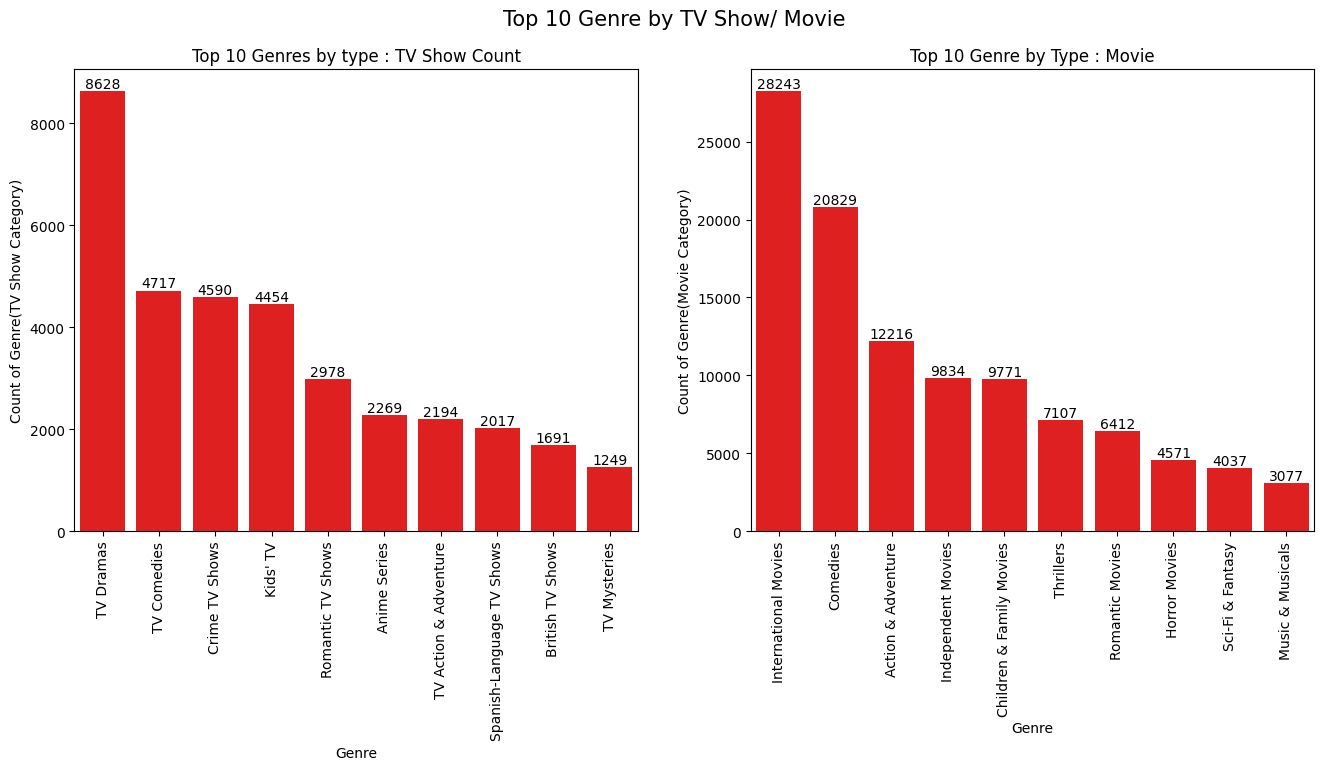

8.1

In [85]:
top_10_movie_genre=final_df.loc[final_df["type"]=="Movie"]["genre"].value_counts()[1:11]
top_10_TVshow_genre=final_df.loc[final_df["type"]=="TV Show"]["genre"].value_counts()[1:11]
plt.figure(figsize=(16,6)).suptitle("Top 10 Genre by TV Show/ Movie",fontsize=15)
plt.subplot(1,2,1)
bar_plot=sns.barplot(x=top_10_TVshow_genre.index,y=top_10_TVshow_genre.values,color="red")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre(TV Show Category)')
plt.title('Top 10 Genres by type : TV Show Count')
for index,value in enumerate(top_10_TVshow_genre.values):
  bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.subplot(1,2,2)
bar_plot=sns.barplot(x=top_10_movie_genre.index,y=top_10_movie_genre.values,color="red")
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Count of Genre(Movie Category)')
plt.title('Top 10 Genre by Type : Movie')
for index,value in enumerate(top_10_movie_genre.values):
  bar_plot.text(index,value,str(value),ha='center',va='bottom')
plt.show()
8.1

This analysis provides insights into viewer preferences which is,"TV Dramas"in Tv show category and "Internatinal Movies" in movie category.

8.How has the number of movies released per year changed over the last 20-30 years?

In [86]:
Movie["release_year"].min()

1942

In [87]:
Movie["release_year"].max()

2021

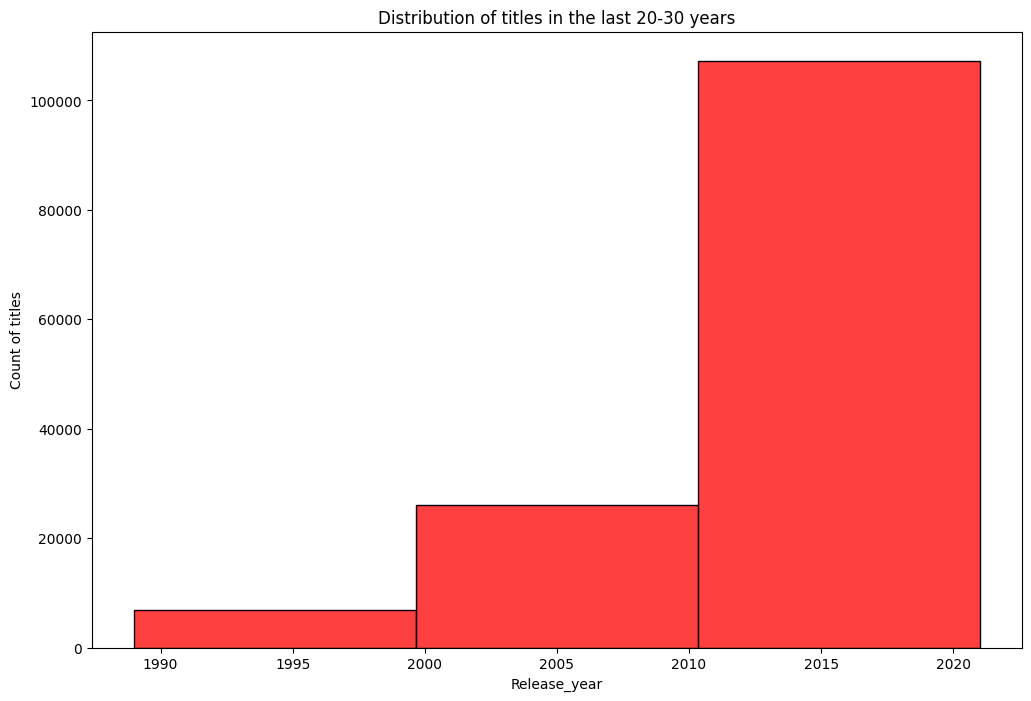

In [88]:
plt.figure(figsize=(12,8))
sns.histplot(Movie['release_year'],binrange=([1989,2021]),bins=3,color="red")
plt.xlabel('Release_year')
plt.ylabel('Count of titles')
plt.title('Distribution of titles in the last 20-30 years')
plt.show()

This analysis shows the quantum of movies added in the last 20-30 years has increased to a great extent especially last 10 years

9.Does Netflix has more focus on TV Shows than movies in recent years

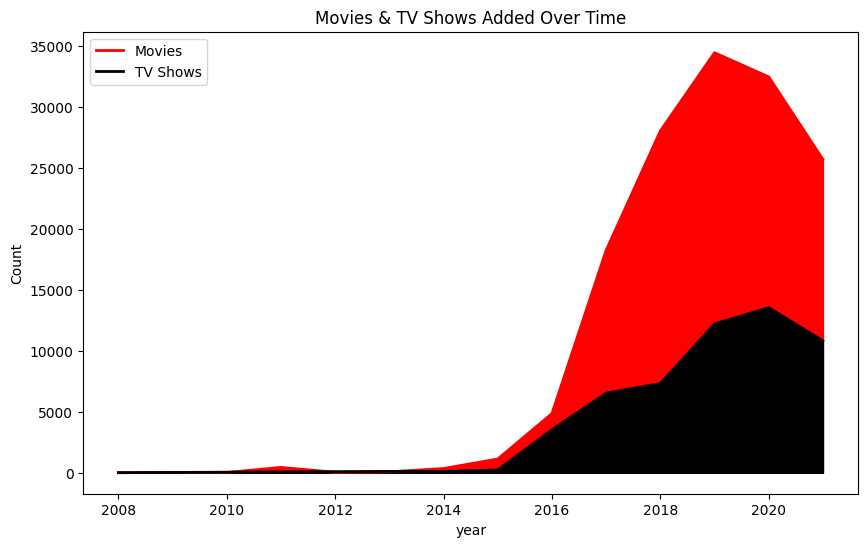

In [89]:
movies_count = Movie['year_added'].value_counts().sort_index()
tv_shows_count = TV_show['year_added'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.plot(movies_count.index,movies_count.values,color='red',label='Movies',linewidth=2)
plt.plot(tv_shows_count.index, tv_shows_count.values,color='black',label='TV Shows', linewidth=2)
plt.fill_between(movies_count.index,movies_count.values,color='red')
plt.fill_between(tv_shows_count.index,tv_shows_count.values,color='black')
plt.xlabel('year')
plt.ylabel('Count')
plt.title('Movies & TV Shows Added Over Time')
plt.legend()
plt.show()

This analysis clearly proves the fact that netflix has added more movies than TV shows.The jump seen in the visualization is more for movies in comparison to TV shows add it also tells us about the viewers preferences.

10.Distribution of Movie Lengths and TV Show Episode Counts.

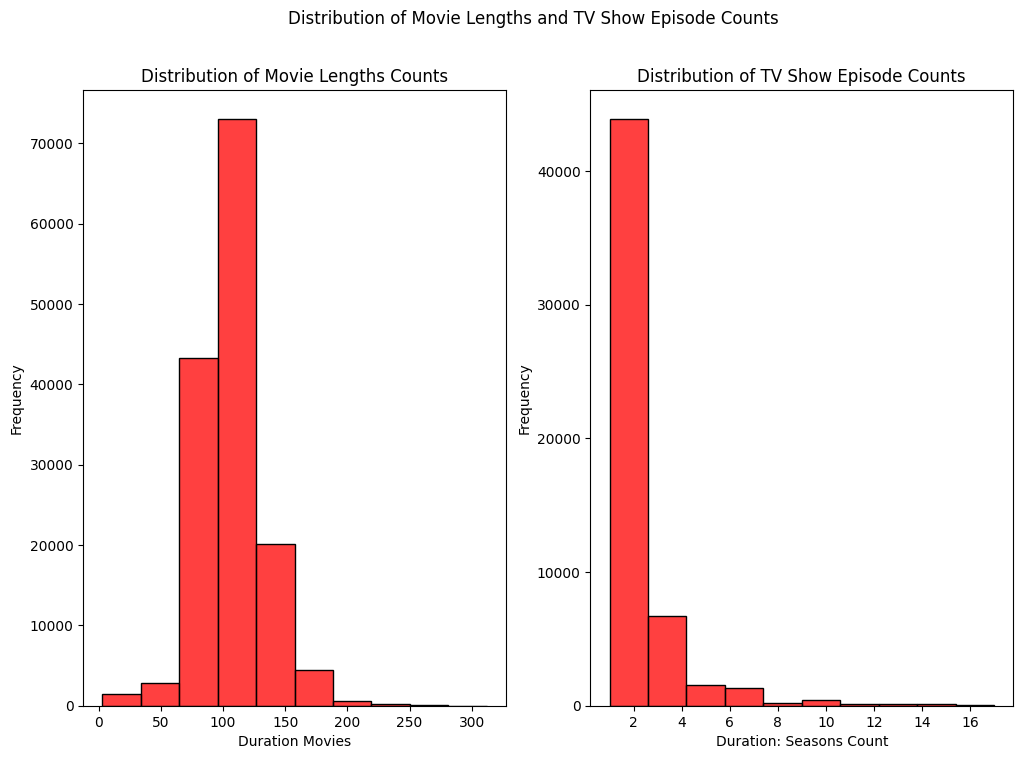

In [90]:
movie_lengths = Movie["duration"].str.extract("(\d+)",expand=False).astype(int)
#duration column is converted into int type
Tv_show_episodes = TV_show["duration"].str.extract("(\d+)", expand=False).astype(int)
plt.figure(figsize=(12,8)).suptitle("Distribution of Movie Lengths and TV Show Episode Counts")
plt.subplot(1,2,1)
sns.histplot(movie_lengths,bins=10,color="red")
plt.xlabel('Duration Movies')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lengths Counts')
plt.subplot(1,2,2)
sns.histplot(Tv_show_episodes,bins=10,color="red")
plt.xlabel('Duration: Seasons Count')
plt.ylabel('Frequency')
plt.title('Distribution of TV Show Episode Counts')
plt.show()

In [91]:
TV_show['duration'] = TV_show['duration'].str.extract('(\d+)',expand=False).astype(int)
Movie['duration'] = Movie['duration'].str.extract('(\d+)',expand=False).astype(int)

<ipython-input-91-a8e00f0e4c91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_show['duration'] = TV_show['duration'].str.extract('(\d+)',expand=False).astype(int)
<ipython-input-91-a8e00f0e4c91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Movie['duration'] = Movie['duration'].str.extract('(\d+)',expand=False).astype(int)


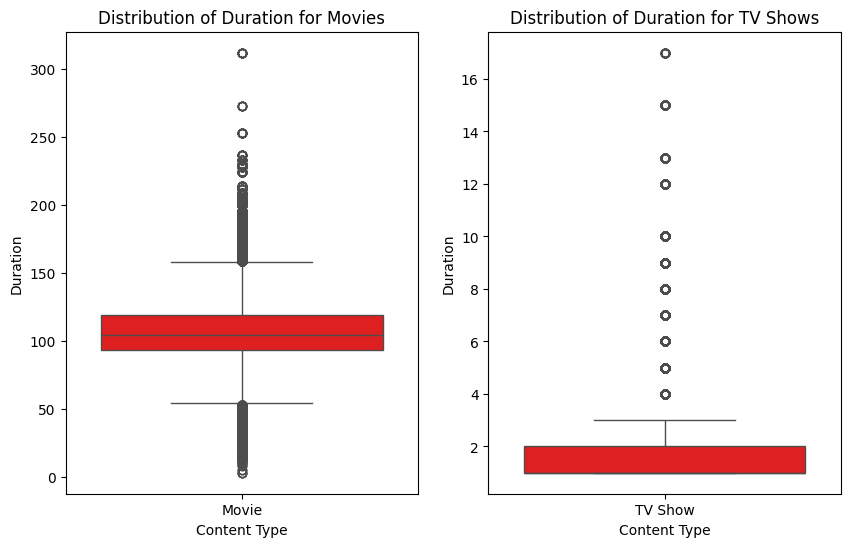

In [92]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxplot(data=Movie, x='type',y='duration',color="red")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for Movies')
plt.subplot(1,2,2)
sns.boxplot(data=TV_show, x='type',y='duration',color="red")
plt.xlabel('Content Type')
plt.ylabel('Duration')
plt.title('Distribution of Duration for TV Shows')
plt.show()

from the above mentioned histogram and box plot analysis it provides insights regarding the duration of movies/Tv shows which are added in the Netflix library.It provides a median value of duration which is 100 minutes approax,2 seasons in movie and TV show category respectively.There are also some movies and Tv shows durations which are acting as an outliers in the box plot.

11.Understanding what content is available in different countries

In [93]:
Country_content_wise=Movie.groupby(["country"])["genre"].value_counts().sort_values(ascending=False)
Country_content_wise=pd.DataFrame(Country_content_wise)
Country_content_wise

count
country       genre                          
United States Comedies                   9171
              Dramas                     9131
India         International Movies       7059
United States Children & Family Movies   5665
India         Dramas                     5569
...                                       ...
Mongolia      International Movies          1
Vatican City  Documentaries                 1
Afghanistan   Documentaries                 1
Vatican City  Faith & Spirituality          1
              International Movies          1

[896 rows x 1 columns]

In [94]:
Country_content_wise_TV = TV_show.groupby(["country"])["genre"].value_counts().sort_values(ascending=False)
Country_content_wise_TV = pd.DataFrame(Country_content_wise_TV)
Country_content_wise_TV

count
country        genre                              
United States  TV Dramas                      3251
               TV Comedies                    2570
               Kids' TV                       2227
               International TV Shows         2219
Japan          International TV Shows         1784
...                                            ...
Czech Republic TV Thrillers                      1
Belgium        Docuseries                        1
United Kingdom Stand-Up Comedy & Talk Shows      1
Uruguay        International TV Shows            1
               Science & Nature TV               1

[517 rows x 1 columns]

Above analysis provides the number of contents available in Movie and Tv show category separately.It also provides the insight regarding the favourability of contents among viewers in different categories.

#Recomendations
As the streaming industry evoloves, understanding these patterns and trends becomes increasingly essential for navigating the dynamic landscape of Netflix and its vast library.Following are some of the recomendations,


*   It should build relationships with other providers preferably the multinational television providers such as "HBO" In order to increase the selection streaming titles
*   This will ultimately lead to attracting more customers and therefore increase in market share


*   It would help in lowering the churn rate and help expand their customer base
*   Continue to produce high-quality original content,This is Netflix biggest strength,and its what has kept subsribers coming back for more.Netflix needs to keep investing in original content that is both critically acclaimed and popular with viewers


*   Offer more affordable subsription plans.Netflix's current subsription plans are relatively expensive,especially compared to some of its competitors.Netflix could offer more affordable subscription palns such as a plan with limited ads,to attract more subscribers








In [95]:
!pip install notebook-as-pdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 15.0.1
    Uninstalling websockets-15.0.1:
      Successfully uninstalled websockets-15.0.1
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.3.0
    Uninstalling urllib3-2.3.0:
      Successfully uninstalled urllib3-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-genai 1.8.0 requires websockets<15.1.0,>=13.0.0, but you have websockets 10.4 which is inc